In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff982baeb60>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


In [0]:
# Prepare dataset

cars_customers_data = spark.read.table("workspace.default.cars_customers")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

print("Dataset", df)

Dataset        CustomerID    FirstName   ...  NumberOfPurchases   ProfitGenerated 
0            11004   Elizabeth   ...                   5        10351.6657
1            11006       Janet   ...                   1        25636.9867
2            11007       Marco   ...                   2         9221.5725
3            11008         Rob   ...                   3        16556.0652
4            11009     Shannon   ...                   1        27955.7062
...            ...          ...  ...                 ...               ...
9995         29459       Marco   ...                   1         3260.0490
9996         29460      Andres   ...                   2         1966.8401
9997         29470      Nathan   ...                   1         1934.2584
9998         29472       Lacey   ...                   1         1154.3211
9999         29474       Jaime   ...                   1         1601.0582

[10000 rows x 16 columns]


In [0]:
df.columns
df.columns = df.columns.str.strip()
df.head()

,CustomerID,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated
0,11004,Elizabeth,,Johnson,1968-08-08,S,75001-100000,F,5,5,Bachelors,Professional,True,1-2 Miles,5,10351.6657
1,11006,Janet,G,Alvarez,1965-12-06,S,50001-75000,F,0,0,Bachelors,Professional,True,5-10 Miles,1,25636.9867
2,11007,Marco,,Mehta,1964-05-09,M,50001-75000,M,3,3,Bachelors,Professional,True,0-1 Miles,2,9221.5725
3,11008,Rob,,Verhoff,1964-07-07,S,50001-75000,F,4,4,Bachelors,Professional,True,10+ Miles,3,16556.0652
4,11009,Shannon,C,Carlson,1964-04-01,S,50001-75000,M,0,0,Bachelors,Professional,False,5-10 Miles,1,27955.7062


In [0]:
df = df.drop(['CustomerID', 'FirstName', 'MiddleName', 'LastName', "ProfitGenerated"], axis=1)   

In [0]:
display(df.BirthDate)

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['BirthDate'] = 2025 - df['BirthDate'].dt.year
#df['birth_month'] = df['birthdate'].dt.month  # optional seasonality signal

df['BirthDate']

0      1968-08-08
1      1965-12-06
2      1964-05-09
3      1964-07-07
4      1964-04-01
          ...    
9995   1977-05-04
9996   1977-03-15
9997   1960-08-25
9998   1960-03-14
9999   1959-10-04
Name: BirthDate, Length: 10000, dtype: datetime64[ns]

0       57
1       60
2       61
3       61
4       61
        ..
9995    48
9996    48
9997    65
9998    65
9999    66
Name: BirthDate, Length: 10000, dtype: int64

In [0]:
df.describe(include='all')

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases
count,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000
unique,NaN,2,5,2,NaN,NaN,5,5,2,5,NaN
top,NaN,M,50001-75000,M,NaN,NaN,Partial College,Professional,True,0-1 Miles,NaN
freq,NaN,5363,2871,5087,NaN,NaN,2947,3345,6464,2398,NaN
mean,64.807500,NaN,NaN,NaN,2.072700,1.081300,NaN,NaN,NaN,NaN,2.251300
std,11.852379,NaN,NaN,NaN,1.716132,1.534055,NaN,NaN,NaN,NaN,0.998222
min,45.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,55.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000
50%,64.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,2.000000
75%,74.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,NaN,3.000000


In [0]:
def convert_categorical_to_numerical(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].astype('category')
            df[column] = df[column].cat.codes
        mapping = dict(zip(df[column], range(len(df[column]))))
    print("Category → Code Mapping:", df[column])


    return df 
# Call the function to convert categorical columns to numerical columns

df = convert_categorical_to_numerical(df)
display(df)

Category → Code Mapping: 0       5
1       1
2       2
3       3
4       1
       ..
9995    1
9996    2
9997    1
9998    1
9999    1
Name: NumberOfPurchases, Length: 10000, dtype: int64


BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases
57,1,3,0,5,5,0,3,1,1,5
60,1,2,0,0,0,0,3,1,4,1
61,0,2,1,3,3,0,3,1,0,2
61,1,2,0,4,4,0,3,1,2,3
61,1,2,1,0,0,0,3,0,4,1
62,0,2,1,4,4,0,3,1,2,4
57,0,3,0,2,0,0,1,1,1,2
57,0,3,1,2,0,0,1,1,0,3
57,1,3,0,3,0,0,1,0,1,3
46,1,1,0,0,0,3,4,0,4,1


In [0]:
y = df['NumberOfPurchases']
X = df.drop(['NumberOfPurchases'], axis=1)

print(X)

      BirthDate  MaritalStatus  ...  HomeOwner  CommuteDistance
0            57              1  ...          1                1
1            60              1  ...          1                4
2            61              0  ...          1                0
3            61              1  ...          1                2
4            61              1  ...          0                4
...         ...            ...  ...        ...              ...
9995         48              1  ...          0                3
9996         48              0  ...          0                0
9997         65              1  ...          0                1
9998         65              0  ...          0                1
9999         66              0  ...          0                0

[10000 rows x 10 columns]


In [0]:
#Split the Data

X_train, X_test, y_train, y_test = train_test_split(df[['BirthDate', 'YearlyIncome', 'NumberChildrenAtHome', 'TotalChildren', 'Gender', 'HomeOwner', 'Occupation', 'Education', 'MaritalStatus']], y, test_size=0.2, random_state=42)

In [0]:
#standardize the data
#scalar = StandardScaler()
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.transform(X_test)

#print(X_train)

#print(X_test)

#df_scaled = pd.DataFrame(scaled_feature, columns=['BirthdateScaled',  'NumberOfPurchasesScaled'])
#display(df_scaled)
#df_scaled.head(1000)

In [0]:
# Simple Linear Regression model to train the set
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [0]:
import numpy as np
y_pred = regression.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[3.1751 3.    ]
 [2.094  2.    ]
 [1.6577 2.    ]
 ...
 [1.4492 2.    ]
 [2.2065 3.    ]
 [1.3984 2.    ]]


In [0]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R2 Score:", r2)

Mean Squared Error: 0.6530732994734954
R2 Score: 0.34625661355539905


In [0]:
print(X_train)
print(y_train)

      MaritalStatus
9254              0
1561              1
1670              0
6087              1
6669              0
...             ...
5734              1
5191              1
5390              0
860               0
7270              0

[8000 rows x 1 columns]
9254    3
1561    1
1670    2
6087    3
6669    1
       ..
5734    3
5191    4
5390    1
860     3
7270    1
Name: NumberOfPurchases, Length: 8000, dtype: int64


In [0]:
# Predict the values

y_pred = regression.predict(X_test[['BirthDate', 'YearlyIncome', 'NumberChildrenAtHome', 'TotalChildren', 'Gender', 'HomeOwner', 'Occupation', 'Education', 'MaritalStatus']])
print(y_pred)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
residuals = y_test - y_pred
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)
print("Adjusted R2 Score:", adjusted_r2)
print("Residuals:", residuals)

print("Mean Squared Error:", mse)

print("R2 Score:", r2)

print(regression.coef_)
print(regression.intercept_)

[3.17512261 2.09398504 1.65770501 ... 1.44915743 2.20654148 1.39838552]
Adjusted R2 Score: 0.3432999851744939
Residuals: 6252   -0.175123
4684   -0.093985
1731    0.342295
4742    0.862961
4521   -1.301317
          ...   
6412   -0.788882
8285    0.333315
7853    0.550843
1095    0.793459
6929    0.601614
Name: NumberOfPurchases, Length: 2000, dtype: float64
Mean Squared Error: 0.6530732994734954
R2 Score: 0.34625661355539905
[-0.00552649  0.40012166  0.10168766  0.07278363 -0.00067488 -0.02138341
 -0.04540814  0.04813501 -0.05733711]
1.6247491216991032


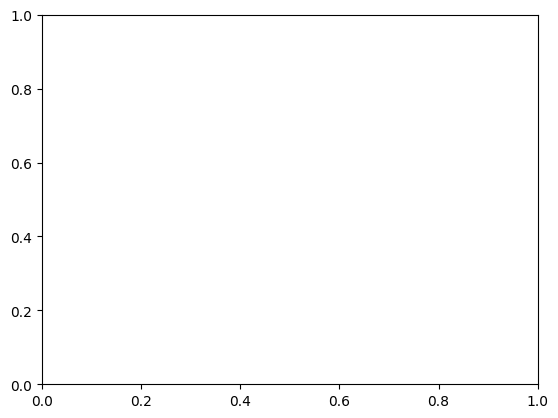

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-8313743337558288>, line 1
----> 1 plt.scatter(X_train, y_train, color = 'red')
      2 plt.plot(X_train, regression.predict(X_train), color = 'blue')
      3 plt.title('Age vs Number of Purchases (Training set)')

File /databricks/python/lib/python3.12/site-packages/matplotlib/pyplot.py:3699, in scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, edgecolors, plotnonfinite, data, **kwargs)
   3680 @_copy_docstring_and_deprecators(Axes.scatter)
   3681 def scatter(
   3682     x: float | ArrayLike,
   (...)
   3697     **kwargs,
   3698 ) -> PathCollection:
-> 3699     __ret = gca().scatter(
   3700         x,
   3701         y,
   3702         s=s,
   3703         c=c,
   3704         marker=marker,
   3705         cmap=cmap,
   3706         norm=norm,
   3707         vmin=vmin,
   3708         vmax=vmax,

In [0]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Age vs Number of Purchases (Training set)')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Age vs Number of Purchases (Test set)')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()
# Create a

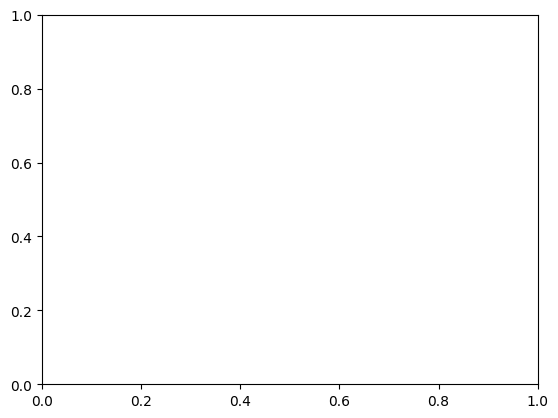

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-6233033489704006>, line 1
----> 1 plt.scatter(X_train, y_train, color = 'red')
      2 plt.plot(X_train, regression.predict(X_train), color = 'blue')
      3 plt.title('Age vs Number of Purchases (Training set)')

File /databricks/python/lib/python3.12/site-packages/matplotlib/pyplot.py:3699, in scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, edgecolors, plotnonfinite, data, **kwargs)
   3680 @_copy_docstring_and_deprecators(Axes.scatter)
   3681 def scatter(
   3682     x: float | ArrayLike,
   (...)
   3697     **kwargs,
   3698 ) -> PathCollection:
-> 3699     __ret = gca().scatter(
   3700         x,
   3701         y,
   3702         s=s,
   3703         c=c,
   3704         marker=marker,
   3705         cmap=cmap,
   3706         norm=norm,
   3707         vmin=vmin,
   3708         vmax=vmax,

In [0]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Age vs Number of Purchases (Training set)')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()


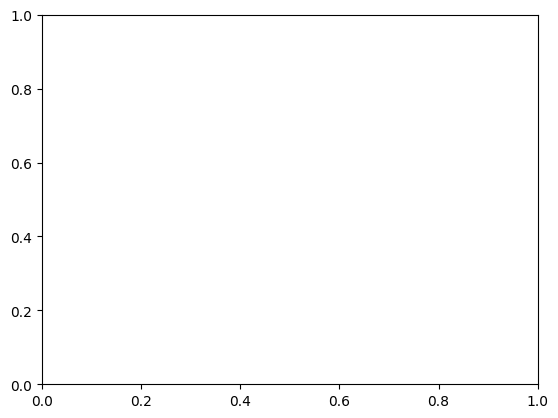

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-7087234965609225>, line 1
----> 1 plt.scatter(X_test, y_test, color = 'red')
      2 plt.plot(X_train, regression.predict(X_train), color = 'blue')
      3 plt.title('Yearly Income vs Number of Purchases (Test set)')

File /databricks/python/lib/python3.12/site-packages/matplotlib/pyplot.py:3699, in scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, edgecolors, plotnonfinite, data, **kwargs)
   3680 @_copy_docstring_and_deprecators(Axes.scatter)
   3681 def scatter(
   3682     x: float | ArrayLike,
   (...)
   3697     **kwargs,
   3698 ) -> PathCollection:
-> 3699     __ret = gca().scatter(
   3700         x,
   3701         y,
   3702         s=s,
   3703         c=c,
   3704         marker=marker,
   3705         cmap=cmap,
   3706         norm=norm,
   3707         vmin=vmin,
   3708         vmax=v

In [0]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Yearly Income vs Number of Purchases (Test set)')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()